<a href="https://colab.research.google.com/github/Taj1920/Data_Analysis/blob/main/Flipkart_Analysis/Flipkart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

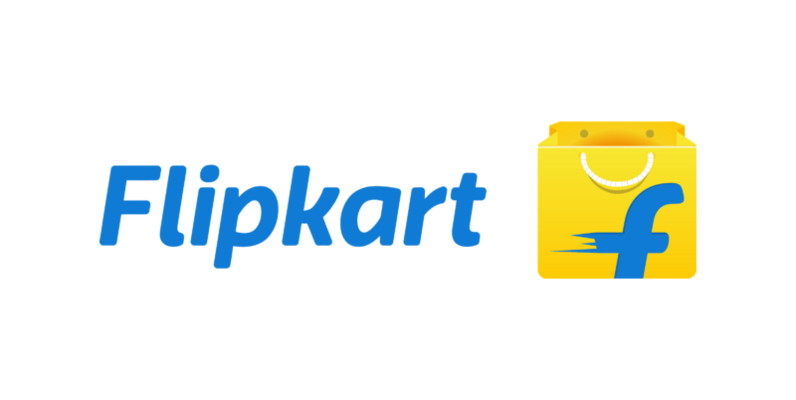

# FLIPKART SALES DATA ANALYSIS

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('flipkart_sales.csv')
df

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1
...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


# DATA CLEANING

In [18]:
# Renaming the columns
df.rename(columns={'Price (INR)':'Price','Total Sales (INR)':'Total Sales'},inplace=True)
df.head()

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [19]:
#Changing the data type of Order date into date time
df['Order Date']=pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         1000 non-null   object        
 1   Product Name     1000 non-null   object        
 2   Category         1000 non-null   object        
 3   Price            1000 non-null   float64       
 4   Quantity Sold    1000 non-null   int64         
 5   Total Sales      1000 non-null   float64       
 6   Order Date       1000 non-null   datetime64[ns]
 7   Payment Method   1000 non-null   object        
 8   Customer Rating  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [20]:
#creating month and year columns.
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year
df.head()

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating,Month,Year
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,9,2024
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,12,2024
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,5,2024
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,11,2024
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,12,2024


In [21]:
df['Month']=df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.head()

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating,Month,Year
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,Sep,2024
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,Dec,2024
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,Nov,2024
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,Dec,2024


# DATA VISUALIZATION

In [22]:
colors=sns.color_palette(['#F7A200','#F8E831','#047BD5'])
colors=sns.color_palette(['#F8E831','#047BD5'])
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

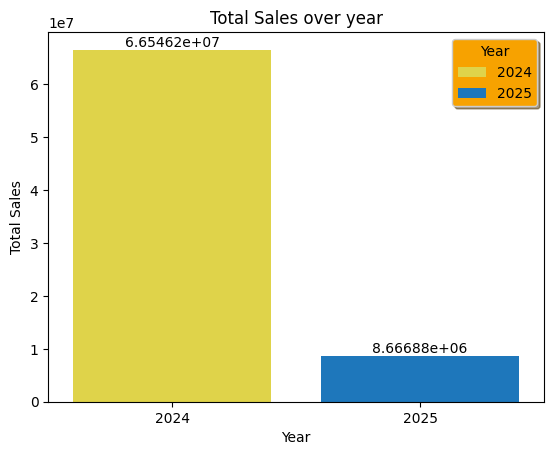

In [23]:
#Total Sales over year
sales=df.groupby('Year')['Total Sales'].sum()
sales=pd.DataFrame(sales)
sales.reset_index(inplace=True)

a=sns.barplot(x='Year',y='Total Sales',hue='Year',data=sales,palette=colors)
plt.legend(shadow=True,facecolor='#F7A200',title='Year')
data_label(a)
plt.title('Total Sales over year')
plt.show()

**Total Sale is more in the year 2024 compared to 2025**

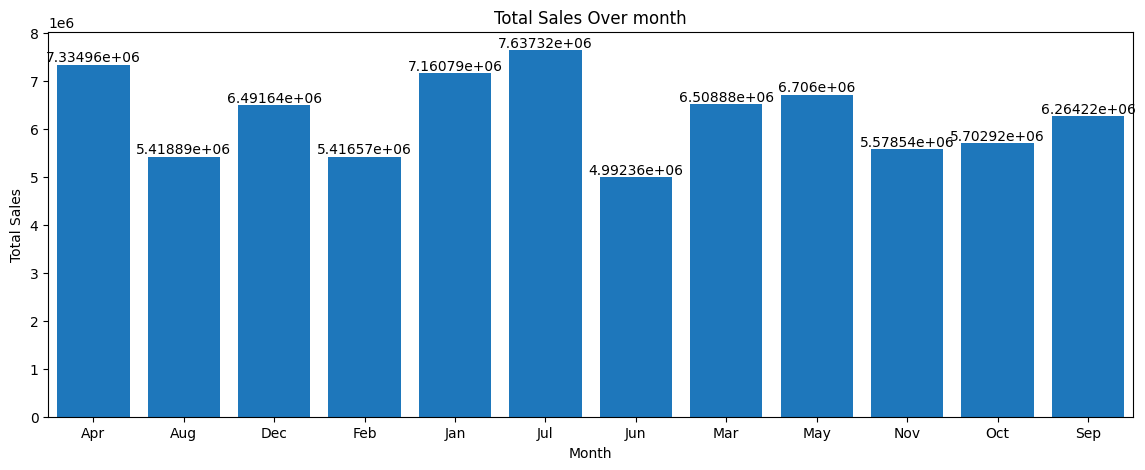

In [24]:
#Total Sales over month
Month=df.groupby('Month')['Total Sales'].sum()
Month=pd.DataFrame(Month)
Month.reset_index(inplace=True)
plt.figure(figsize=(14,5))
a=sns.barplot(x='Month',y='Total Sales',data=Month,color='#047BD5')
data_label(a)
plt.title('Total Sales Over month')
plt.show()

**In the month of Jan,Jul  and Apr Total Sale is more.**

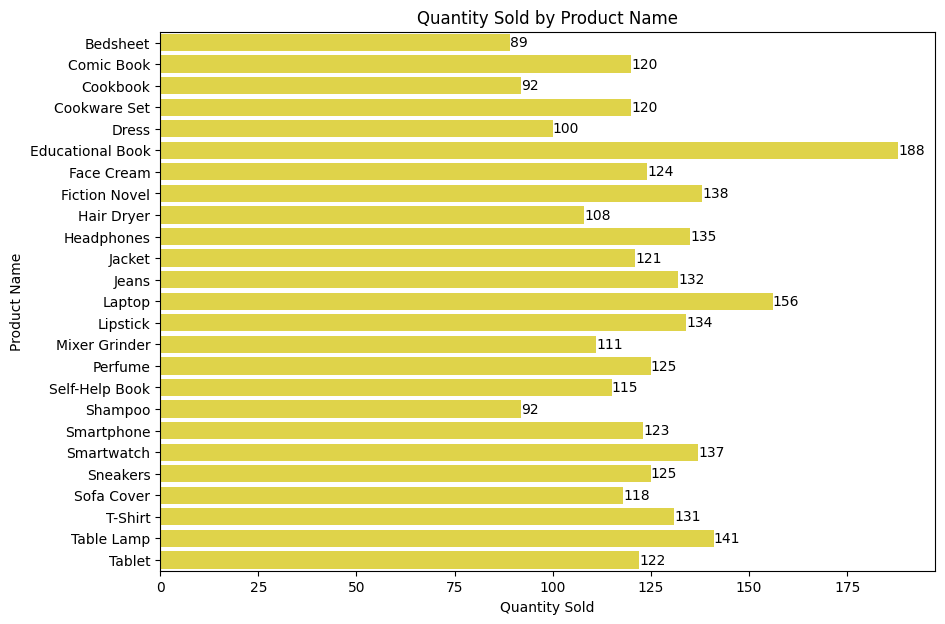

In [78]:
#count by product name
plt.figure(figsize=(10,7))
prod_quantity=df.groupby('Product Name')['Quantity Sold'].sum()
prod_quantity=pd.DataFrame(prod_quantity).reset_index()
a=sns.barplot(x='Quantity Sold',y='Product Name',data=prod_quantity,color='#F8E831')
plt.title('Quantity Sold by Product Name')
data_label(a)
plt.show()

**Educational Book, Laptop and Table Lamp got sold more compared to other products.**

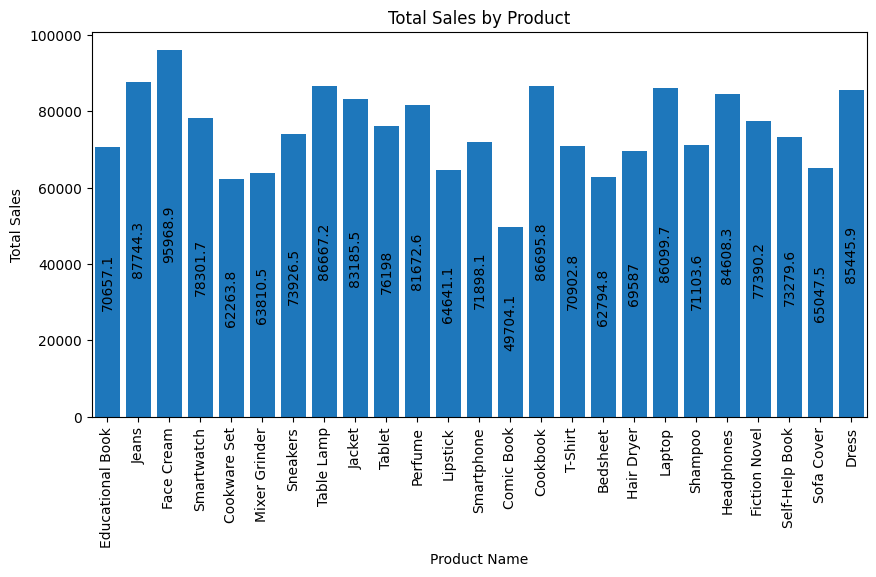

In [27]:
#Total Sales by product name
a=df.groupby('Product Name')['Total Sales'].sum()
a=pd.DataFrame(a)
plt.figure(figsize=(10,5))
b=sns.barplot(x='Product Name',y='Total Sales',color='#047BD5',data=df,errorbar=None)
for i in b.containers:
  b.bar_label(i,rotation=90,label_type='center')
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

**For Products such as Face cream, Jeans, Table Lamp , Cook Book, Laptop, headphones ,Dress Got High Sales.**

In [28]:
df.head()

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating,Month,Year
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,Sep,2024
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,Dec,2024
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,Nov,2024
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,Dec,2024


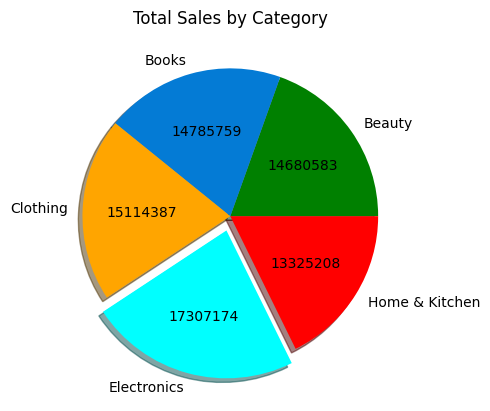

In [77]:
#Total Sales by Category
a=df.groupby('Category')['Total Sales'].sum()
a=pd.DataFrame(a)
b=a['Total Sales']
plt.pie(a['Total Sales'],labels=a.index,colors=['green','#047BD5','orange','cyan','red'],autopct=lambda p: f'{int(p*sum(b)/100)}',shadow=True,explode=(0,0,0,0.1,0))
plt.title('Total Sales by Category')
plt.show()

**Sales are more for Clothing and Electronics category compared to others.**

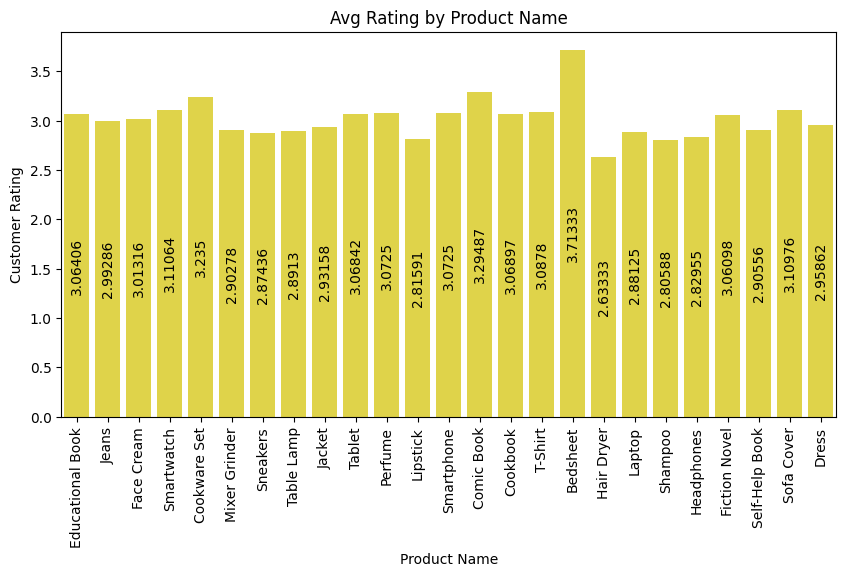

In [79]:
#Rating by Product Name
plt.figure(figsize=(10,5))
a=sns.barplot(x='Product Name',y='Customer Rating',color='#F8E831',data=df,errorbar=None)
for i in a.containers:
  a.bar_label(i,rotation=90,label_type='center')
plt.title('Avg Rating by Product Name')
plt.xticks(rotation=90)
plt.show()

**Customers are liking products such as Bedsheet, Comic book, smartphone, perfume, tablet, cook ware set, smartwatch , facecream, Educational book.**

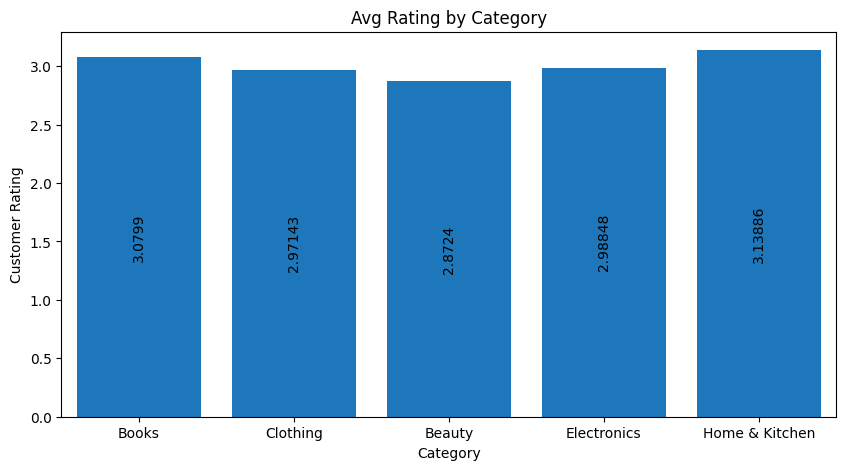

In [69]:
#Rating by Category
plt.figure(figsize=(10,5))
a=sns.barplot(x='Category',y='Customer Rating',color='#047BD5',data=df,errorbar=None)
for i in a.containers:
  a.bar_label(i,rotation=90,label_type='center')
plt.title('Avg Rating by Category')
plt.show()

**Customers are liking products in categories such as Home & kitchen  and Books.**

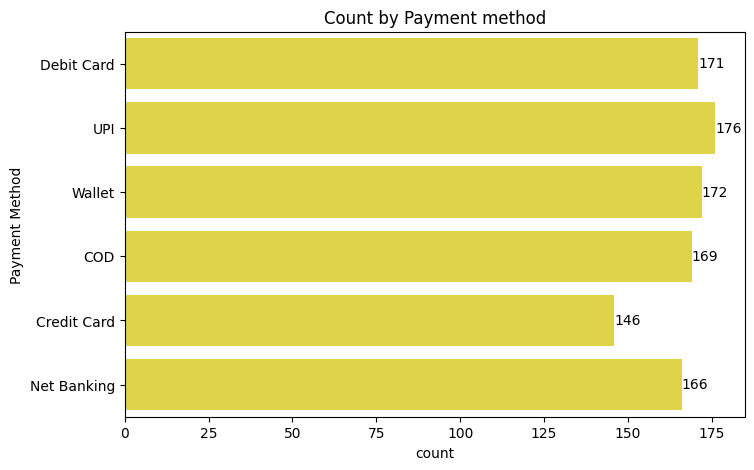

In [81]:
plt.figure(figsize=(8,5))
a=sns.countplot(y='Payment Method',data=df,color='#F8E831')
plt.title('Count by Payment method')
data_label(a)

**Most of the customers are doing payments through UPI, wallet, debit card compared to others.**

#Conclusion:
#1.Total Sale is more in the year 2024 compared to 2025   
#2.In the month of Jan,Jul  and Apr Total Sale is more.
#3.Educational Book, Laptop and Table Lamp got sold more compared to other products.
#4.For Products such as Face cream, Jeans, Table Lamp , Cook Book, Laptop, headphones ,Dress Got High Sales.
#5.Sales are more for Clothing and Electronics category compared to others.
#6.Customers are liking products such as Bedsheet, Comic book, smartphone, perfume, tablet, cook ware set, smartwatch , facecream, Educational book.
#7.Most of the customers are doing payments through UPI, wallet, debit card compared to others.


